In [2]:
import chess.engine
import chess 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import chess.pgn 
from stockfish import Stockfish
import pandas as pd
import time
import numpy as np
import json
import regex as re

In [3]:
path = "..\data\Landing\lichess_2024.ndjson"
df = pd.read_json(path, lines=True)
df = df.head(50)

In [4]:
df.head()

,Event,Site,Date,Round,White,Black,Result,Moves,WhiteElo,BlackElo
0,Rated Rapid game,https://lichess.org/baWRg5co,2024-05-01,-,julio_arias2,Nanaldopark,0-1,"[e2e4, e7e5, g1f3, d8f6, f1c4, f8c5, e1g1, d7d...",1309,1364
1,Blitz swiss https://lichess.org/swiss/15y3UNO4,https://lichess.org/YRVwgatE,2024-05-01,-,tbecalli,Adriano_BSB,0-1,"[e2e4, c7c5, g1f3, g7g6, f1c4, f8g7, b1c3, e7e...",1568,1904
2,Blitz swiss https://lichess.org/swiss/15y3UNO4,https://lichess.org/BdeuuqT0,2024-05-01,-,OLIVEIRA13,jckawagoe,0-1,"[e2e4, e7e5, g1f3, b8c6, f1c4, g8f6, d2d3, f8c...",1903,2147
3,Classical swiss https://lichess.org/swiss/Gx0a...,https://lichess.org/3XzZoc9U,2024-05-01,-,enrique191060,electronicmoon,0-1,"[e2e4, c7c6, c2c3, d7d5, e4e5, c8f5, d2d4, e7e...",1842,1589
4,Classical swiss https://lichess.org/swiss/Gx0a...,https://lichess.org/Hqw2BCcD,2024-05-01,-,MarkusAndreaEP,muhammad3631,0-1,"[e2e4, c7c5, g1f3, d7d6, d2d4, c5d4, f3d4, g8f...",1643,1956


In [ ]:
import maia_functions as mf
i = 0 
stockfish=Stockfish("../stockfish/stockfish-windows-x86-64-avx2.exe")
stockfish.set_depth(12)#How deep the AI looks


starttime = time.time()
for index, row in df.iterrows():
    i += 1
    print(i)
    if i > 50:
        break
    
    cpls = mf.maia_cpl(row, stockfish)
    df.at[index, "maia_cpl_w"] = cpls[0]
    df.at[index, "maia_cpl_b"] = cpls[1]
endtime = time.time()
print(f"time taken: {endtime - starttime}")

Here we are benchmarking the time taken to analyse 50 games of chess. The overall time taken was 177.33 Seconds approximately 3 minutes. Around 3.6 seconds per game. Much faster than expected.

These are the steps taken in the analysis. 
1. Initiate a Maia engine for both white and black (The closest Maia enigne to each of their ratings), the Maia engines range from 1100, 1200, ... , 1800, 1900.
2. Then while ignoring the first 6 moves, we then find the Maia engines recommended move for black and white.
3. Then we compare the difference of the stockfish evaluation between the Maia Engine move, and then move that was actually played to find the Maia Centipawn loss.
4. Then we aggregate this difference over the entire game. 
5. Repeat.

Notes:
- White Maia CPL: Evaluation of Maia move - evaluation of actual move. Black Maia CPL: Mvaluation of actual move - evaluation fo Maia move.
- Unlike the cpl for stockfish where you can never play a better move than the engine, here a player can outperform the Maia Engine

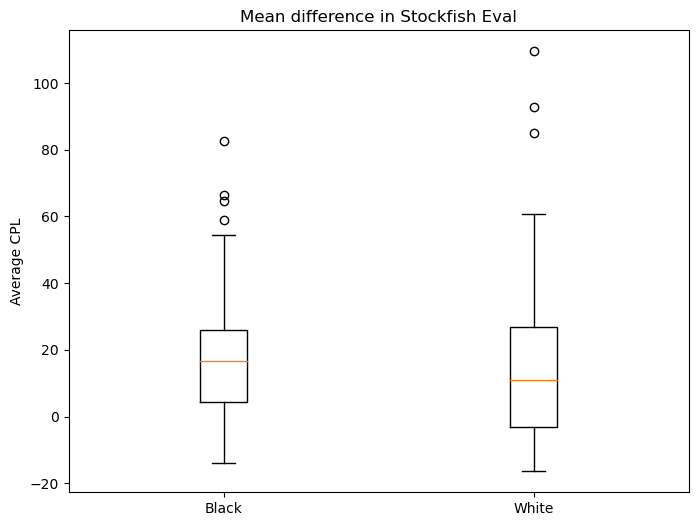

In [16]:
df = df.head(50)
# Plot box plot
plt.figure(figsize=(8, 6))
plt.boxplot([df['maia_cpl_b'], df['maia_cpl_w']], labels = ["Black", "White"])
plt.title('Mean difference in Stockfish Eval')
plt.ylabel('Average CPL')

plt.show()

In [23]:
def time_to_seconds(time):
    hours, minutes, seconds = map(float, time)
    return hours * 3600 + minutes * 60 + seconds

In [26]:
paths = ["../data/tornelo/FIDE/wuocc-blitz-div-d.pgn"] # , "../data/tornelo/FIDE/wuocc-blitz-div-b.pgn"
games = []
for pgn in paths:
    pgn_file = open(pgn)
    game = chess.pgn.read_game(pgn_file)
    while game is not None:
        data = {
                    'Event': game.headers.get('Event', ''), 
                    'Site': game.headers.get('Site', ''), 
                    'Date': game.headers.get('Date', ''), 
                    'Round': game.headers.get('Round', ''), 
                    'White': game.headers.get('White', ''), 
                    'Black': game.headers.get('Black', ''), 
                    'Result': game.headers.get('Result', ''), 
                    'Moves': [str(move) for move in game.mainline_moves()], 
                    'WhiteElo': game.headers.get('WhiteElo', ''), 
                    'BlackElo': game.headers.get('BlackElo', '')}
    
        # Read the next game
        game = chess.pgn.read_game(pgn_file)
        games.append(data)
    pgn_file.close()
    

Gabuzyan, Hovhannes
Palencia, Julio
[182.0, 178.8, 180.6, 179.1, 181.3, 178.6, 182.4, 179.2, 183.3, 179.9, 184.0, 180.2, 184.9, 180.9, 185.4, 172.7, 185.4, 172.3, 184.4, 172.4, 184.4, 169.6, 184.7, 159.9, 184.6, 150.0, 183.9, 143.0, 183.4, 142.8, 184.2, 133.5, 184.6, 133.6, 185.5, 130.6, 185.8, 120.3, 183.2, 116.8, 183.8, 103.4, 183.1, 92.1, 183.4, 82.9, 183.5, 82.0, 183.7, 59.9, 184.0, 60.4, 178.9, 54.1, 177.5, 48.1, 177.9, 47.4, 178.5, 47.6, 177.6, 38.8, 177.4, 35.1, 177.2, 31.4, 177.5, 30.3, 178.0, 29.5, 178.6, 26.5, 177.6, 19.9, 177.3, 17.9, 177.5, 16.5, 176.8, 15.6, 176.9]
[0, 0, 1.4, -0.3, -0.7, 0.5, -1.1, -0.6, -0.9, -0.7, -0.7, -0.3, -0.9, -0.7, -0.5, 8.2, 0.0, 0.4, 1.0, -0.1, 0.0, 2.8, -0.3, 9.7, 0.1, 9.9, 0.7, 7.0, 0.5, 0.2, -0.8, 9.3, -0.4, -0.1, -0.9, 3.0, -0.3, 10.3, 2.6, 3.5, -0.6, 13.4, 0.7, 11.3, -0.3, 9.2, -0.1, 0.9, -0.2, 22.1, -0.3, -0.5, 5.1, 6.3, 1.4, 6.0, -0.4, 0.7, -0.6, -0.2, 0.9, 8.8, 0.2, 3.7, 0.2, 3.7, -0.3, 1.1, -0.5, 0.8, -0.6, 3.0, 1.0, 6.6, 0.3, 2.0, -0.2

In [4]:
print(len(games))
games = [game for game in games if game["WhiteElo"] != "" and game["BlackElo"] != ""]
print(len(games))

1114
437


In [43]:
path = "..\data\Raw\wuocc-blitz-div-d_raw.ndjson"

# Save to a newline-delimited JSON file
with open(path, 'w') as f:
    for entry in games:
        json_line = json.dumps(entry)
        f.write(json_line + '\n')

In [44]:
df = pd.read_json(path, lines=True)

In [ ]:
import maia_functions as mf
stockfish=Stockfish("../stockfish/stockfish-windows-x86-64-avx2.exe")
stockfish.set_depth(13)#How deep the AI looks

err_count = 0
starttime = time.time()
for index, row in df.iterrows():
    try:
        cpls = mf.maia_cpl(row, stockfish)
        df.at[index, "maia_cpl_w"] = cpls[0]
        df.at[index, "maia_cpl_b"] = cpls[1]
    except:
        err_count += 1
        print(cpls)
        print("---------------------------------------------------------------")

endtime = time.time()
print(f"time taken: {endtime - starttime}")

In [49]:
df.to_csv("../data/Curated/maia_cpl_wuocc_blitz_div-d.csv", index = False)